In [1]:
import pandas as pd
import numpy as np

In [2]:
morttrainV = pd.read_csv("train_values.csv")
morttrainV.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [3]:
morttrainL = pd.read_csv("train_labels.csv")
morttrainL.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [4]:
morttrainV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

In [5]:
morttrainL.accepted.value_counts()

1    250114
0    249886
Name: accepted, dtype: int64

In [6]:
print("Train Label Shape", morttrainL.shape)
print ("Train Value Shape", morttrainV.shape)

Train Label Shape (500000, 2)
Train Value Shape (500000, 22)


### Exploratory Data Analysis

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

(array([249886.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 250114.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

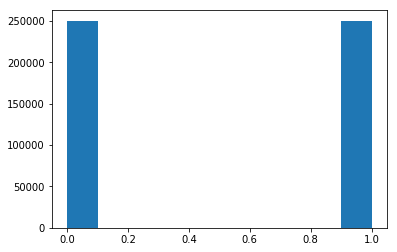

In [8]:
plt.hist(morttrainL.accepted)

In [47]:
Stats = morttrainV.describe()

In [48]:
Stats.to_csv('summaryStats.csv')

In [10]:
#Minimum Loan amount
morttrainV.loan_amount.min()

1.0

In [11]:
#Maximum Loan Amount
morttrainV.loan_amount.max()

100878.0

In [12]:
#MeanLoan Amount
morttrainV.loan_amount.mean()

221.753158

In [13]:
#Median Loan Amount
morttrainV.loan_amount.median()

162.0

In [14]:
#Standard Dev. Loan Amount
morttrainV.loan_amount.std()

590.6416481879309

In [15]:
import statistics

In [16]:
statistics.stdev(morttrainV.loan_amount)

590.6416481879179

Text(0.5, 1.0, 'Histogram of Loan Amount')

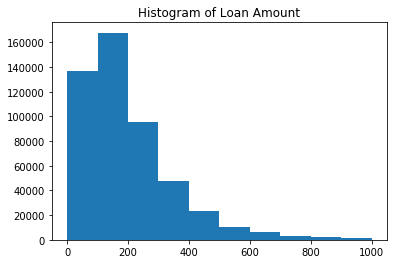

In [17]:
#Distribution of loan amount
plt.hist(morttrainV.loan_amount, bins=10, range=(0, 1000))
plt.title("Histogram of Loan Amount")

In [18]:
#Loan acceptance rate accross ethnicity and Gender
#Where loan acceptance rate is the average value of accepted
mortNew = pd.concat((morttrainV, morttrainL.accepted), axis = 1)
mortNew.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


#### Applicants where applicant_ethnicity=4 have a higher loan acceptance rate on average than where applicant_ethnicity=1.

In [19]:
mortNew[mortNew.applicant_ethnicity == 4]["accepted"].mean()

0.789310878157759

In [20]:
mortNew[mortNew.applicant_ethnicity == 1]["accepted"].mean()

0.427413324938019

#### Applicants where applicant_sex=1 have a higher loan acceptance rate on average than where applicant_sex=2.

In [21]:
mortNew[mortNew.applicant_sex == 1]["accepted"].mean()

0.520822910267696

In [22]:
mortNew[mortNew.applicant_sex == 2]["accepted"].mean()

0.46645342814748453

### Relationship between Applicants income and loan amount for state45 applicants

In [23]:
mortNew45 = mortNew[mortNew["state_code"] == 45]

In [24]:
mo=mortNew45[["applicant_income", "loan_amount"]]

In [25]:
mo.corr()

,applicant_income,loan_amount
applicant_income,1.000000,0.629981
loan_amount,0.629981,1.000000


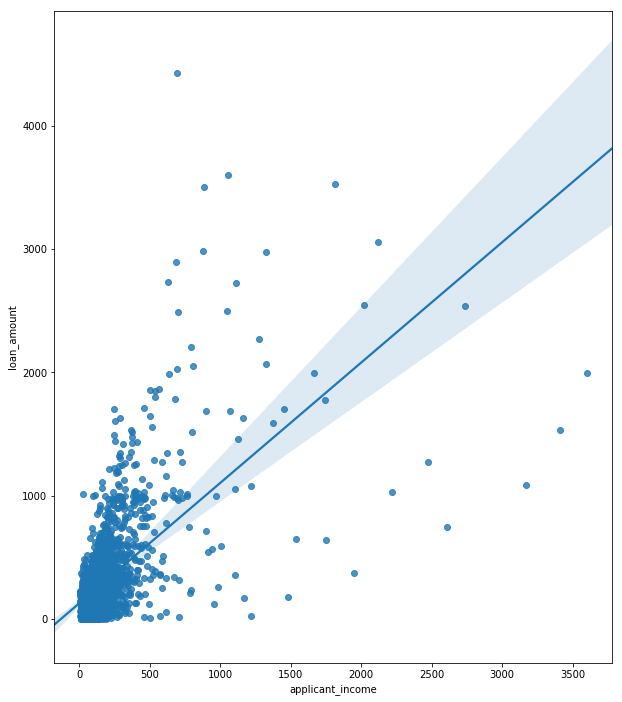

In [26]:
plt.figure(figsize = (10, 12))
#sns.scatterplot(mortNew["applicant_income"], mortNew["loan_amount"], hue= mortNew["state_code"] == 45)
sns.regplot(mortNew45["applicant_income"], mortNew45["loan_amount"])
#sns.plt.ylim(0,1000)
#sns.plt.xlim(0,1000)

#### Loan acceptance accross countries

Limiting to just state 48 and ignoring where country is missing, what is true?

In [27]:
mo48 = mortNew[mortNew.state_code == 48][["county_code","accepted"]]

In [28]:
mo48.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15761 entries, 27 to 499874
Data columns (total 2 columns):
county_code    15761 non-null int64
accepted       15761 non-null int64
dtypes: int64(2)
memory usage: 369.4 KB


In [29]:
indexnames = mo48[mo48.county_code == -1].index

#Delete these row indexes from the dataframe
mo48.drop(indexnames, inplace = True)

In [30]:
mo48["accepted"].value_counts()

0    8052
1    7659
Name: accepted, dtype: int64

In [31]:
mo48.describe()

,county_code,accepted
count,15711.000000,15711.000000
mean,162.897524,0.487493
std,101.861130,0.499859
min,2.000000,0.000000
25%,72.000000,0.000000
50%,137.000000,0.000000
75%,251.000000,1.000000
max,321.000000,1.000000


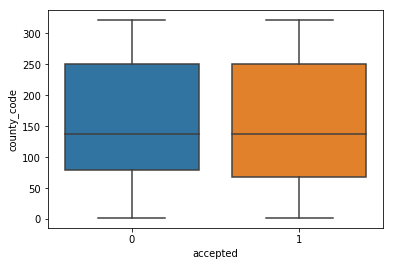

In [32]:
sns.boxplot(x="accepted", y = "county_code", data= mo48)

### Loan Type accross states

In [33]:
mo24 = mortNew[mortNew.state_code.isin([2,4])][["state_code","loan_type", "accepted"]]

In [34]:
mo24.head()

,state_code,loan_type,accepted
14,2,1,0
20,2,1,0
52,2,1,1
54,4,1,0
60,2,1,0


In [45]:
#loan acceptance rate in state 2, for each of the four loan types
mo24[mo24.state_code == 2]["accepted"].mean()

0.4567042972715248

In [46]:
#loan acceptance rate in state 4, for each of the four loan types
mo24[mo24.state_code == 4]["accepted"].mean()

0.5753616425571628

In [43]:
#overall loan acceptance rate in state 2 and state 4 
mo24["accepted"].mean()

0.4903343840236295

In [35]:
mo24a =mo24[mo24.accepted == 1][["state_code","loan_type", "accepted"]]

In [ ]:
[mo24a.state_code == 2]

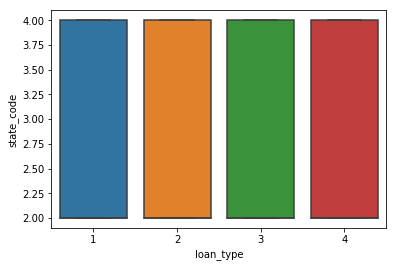

In [36]:
sns.boxplot(y="state_code", x = "loan_type", data= mo24a)